In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils.parse_results import get_results

In [2]:
datatsets = ["dsads", "rwhar"]
architectures = ["attend"]
methods = ["unconstrained-synchronous_multisensor",
           "opportunistic-asynchronous_single_sensor",
           "opportunistic-asynchronous_multisensor",
           "opportunistic-asynchronous_multisensor_time_context",
           "conservative-asynchronous_single_sensor",
           "conservative-asynchronous_multisensor",
           "conservative-asynchronous_multisensor_time_context"]
base_path = "../saved_data/results/"

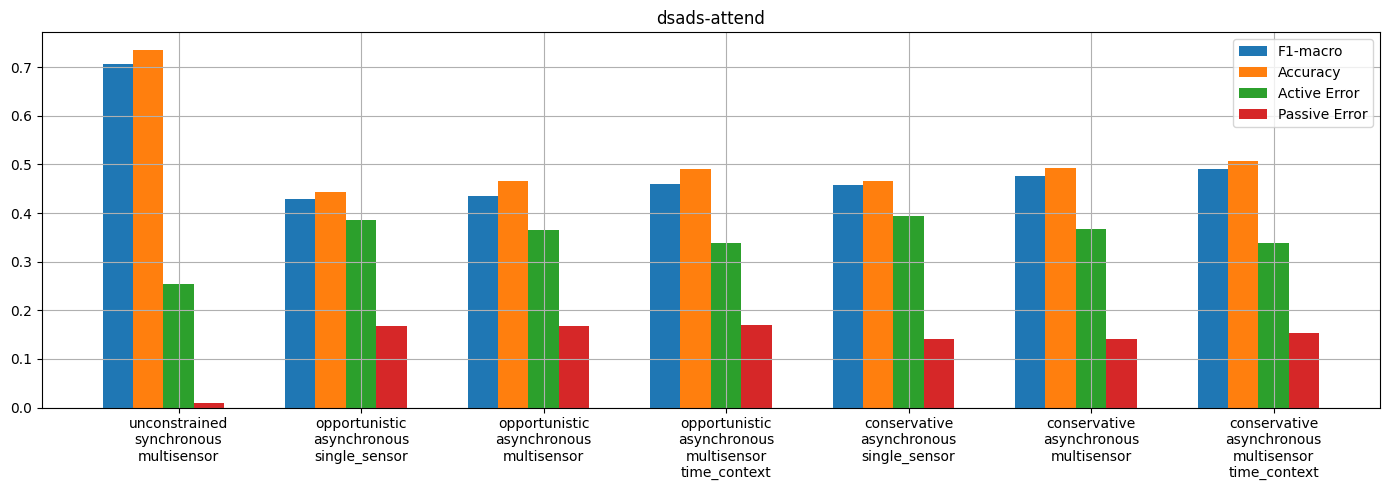

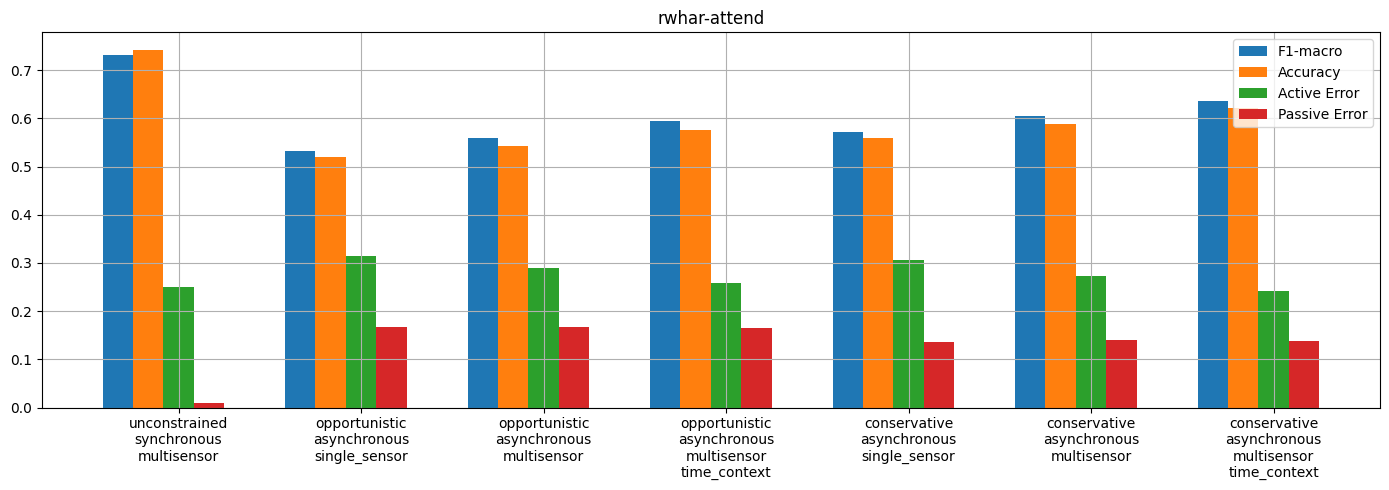

In [20]:
# Create an array for the positions of the bars
group_width = 5  # Width of the whole group
bar_width = 1  # Width of individual bars
num_groups = len(methods)
num_bars_per_group = 4
space_between_groups = 1  # Space between groups

# Set up the positions for the bars
x_positions = np.arange(num_groups) * (group_width + space_between_groups)  # x positions for each group
result_types = ['F1-macro','Accuracy','Active Error','Passive Error']
method_names = ["unconstrained\nsynchronous\nmultisensor",
                "opportunistic\nasynchronous\nsingle_sensor",
                "opportunistic\nasynchronous\nmultisensor",
                "opportunistic\nasynchronous\nmultisensor\ntime_context",
                "conservative\nasynchronous\nsingle_sensor",
                "conservative\nasynchronous\nmultisensor",
                "conservative\nasynchronous\nmultisensor\ntime_context"]

for dataset in datatsets:
    for arch in architectures:
        fig,ax = plt.subplots(1,1,figsize=(14,5))
        ax.set_title(f"{dataset}-{arch}")
        results = []
        for method in methods:
            result_path = os.path.join(base_path,dataset,arch,method)
            result_logs = [os.path.join(result_path, filename) for filename in os.listdir(result_path)]
            mean, std = get_results(result_logs)
            f1_mean, acc_mean, active_region_mean, passive_region_mean, active_err_mean, passive_err_mean = mean
            f1_std, acc_std, active_region_std, passive_region_std, active_err_std, passive_err_std = std
            items_mean = np.array([f1_mean,acc_mean,active_region_mean*active_err_mean,passive_region_mean*passive_err_mean])
            results.append(items_mean)
            # Shift each bar in the group by a small offset
        results = np.stack(results)
        for i in range(results.shape[1]):
            ax.bar(x_positions + (i - num_bars_per_group / 2) * bar_width, results[:,i], 
                    width=bar_width, label=result_types[i])
        ax.legend()
        ax.set_xticks(x_positions)
        ax.set_xticklabels([method for method in method_names])
        ax.grid()
        plt.tight_layout()


            

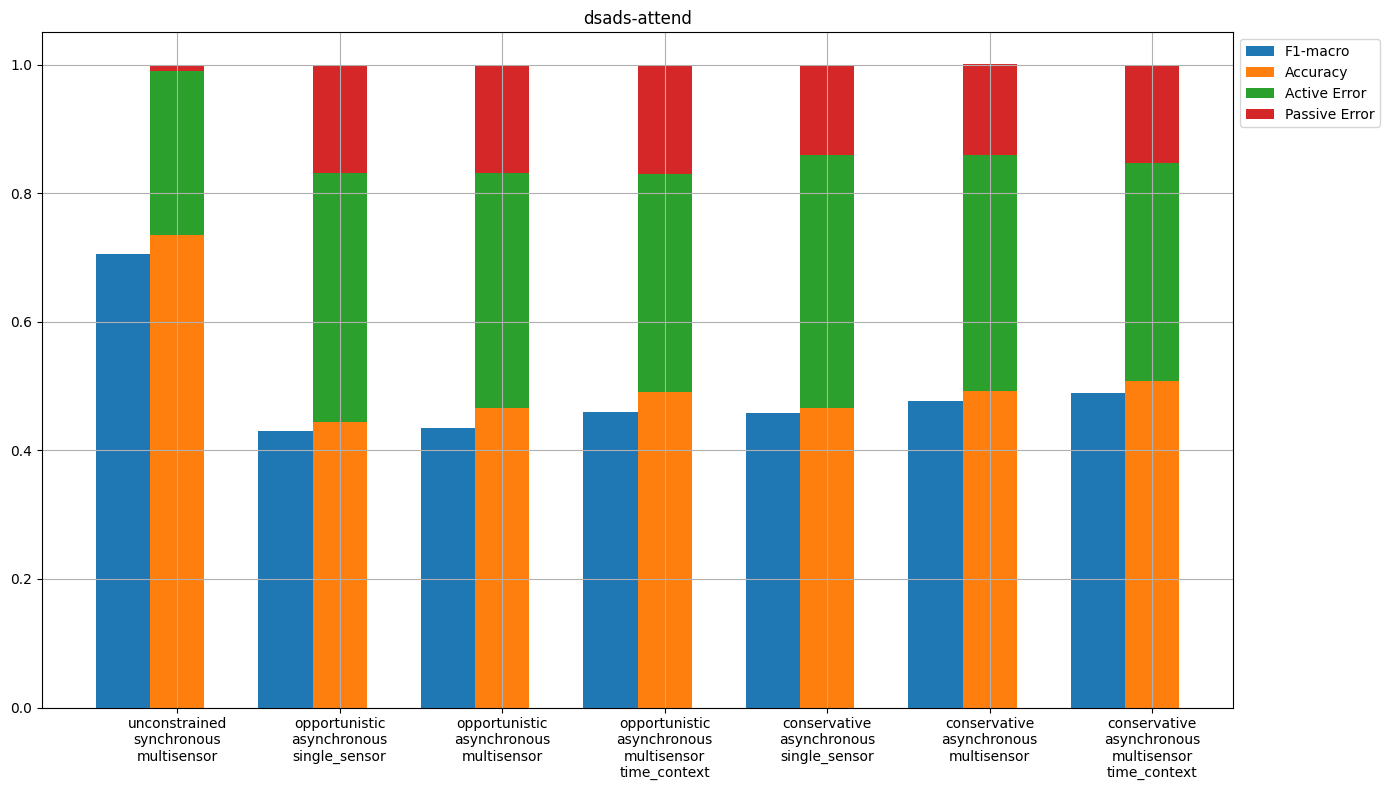

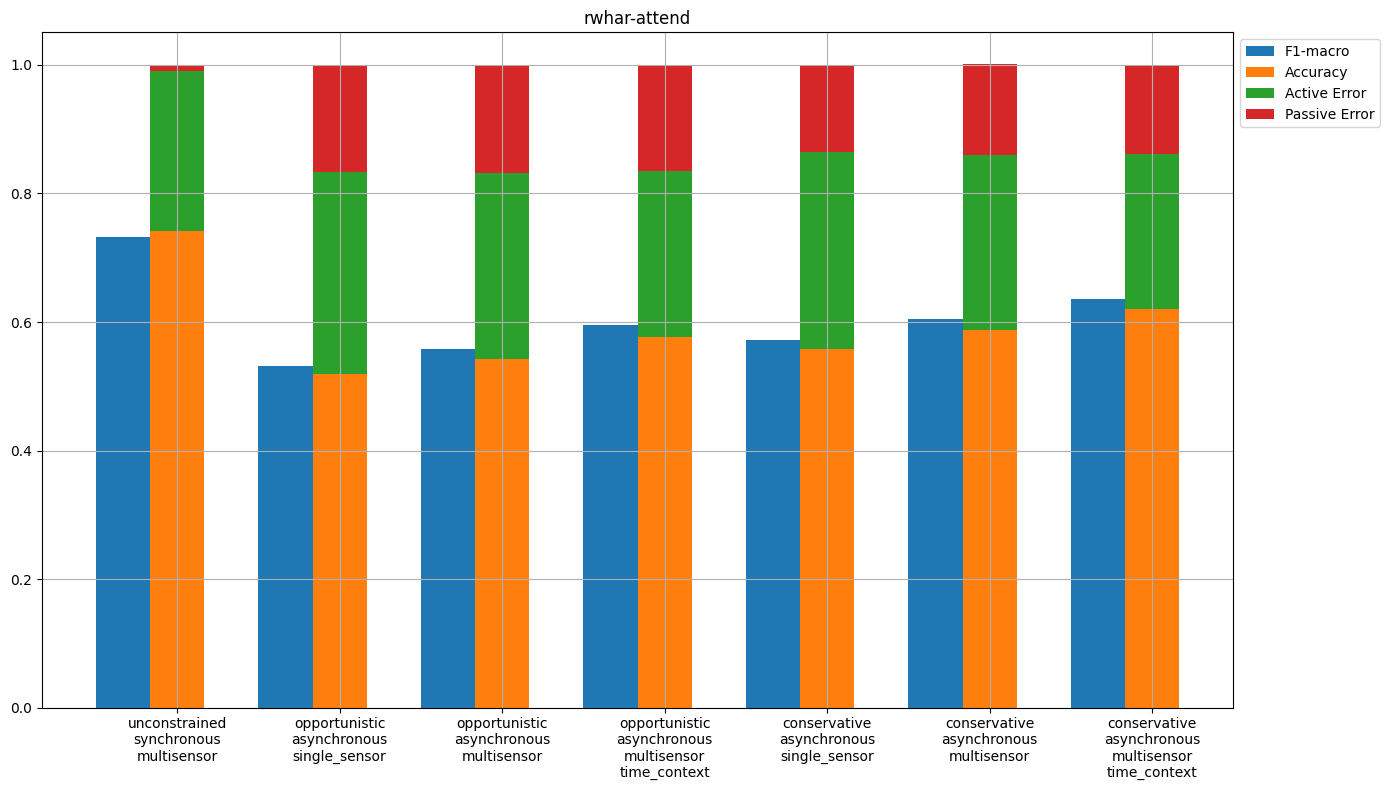

In [33]:
# Create an array for the positions of the bars
group_width = 5  # Width of the whole group
bar_width = 2  # Width of individual bars
num_groups = len(methods)
num_bars_per_group = 2
space_between_groups = 1  # Space between groups

# Set up the positions for the bars
x_positions = np.arange(num_groups) * (group_width + space_between_groups)  # x positions for each group
result_types = ['F1-macro','Accuracy','Active Error','Passive Error']
method_names = ["unconstrained\nsynchronous\nmultisensor",
                "opportunistic\nasynchronous\nsingle_sensor",
                "opportunistic\nasynchronous\nmultisensor",
                "opportunistic\nasynchronous\nmultisensor\ntime_context",
                "conservative\nasynchronous\nsingle_sensor",
                "conservative\nasynchronous\nmultisensor",
                "conservative\nasynchronous\nmultisensor\ntime_context"]

for dataset in datatsets:
    for arch in architectures:
        fig,ax = plt.subplots(1,1,figsize=(14,8))
        ax.set_title(f"{dataset}-{arch}")
        results = []
        for method in methods:
            result_path = os.path.join(base_path,dataset,arch,method)
            result_logs = [os.path.join(result_path, filename) for filename in os.listdir(result_path)]
            mean, std = get_results(result_logs)
            f1_mean, acc_mean, active_region_mean, passive_region_mean, active_err_mean, passive_err_mean = mean
            f1_std, acc_std, active_region_std, passive_region_std, active_err_std, passive_err_std = std
            items_mean = np.array([f1_mean,acc_mean,active_region_mean*active_err_mean,passive_region_mean*passive_err_mean])
            results.append(items_mean)
            # Shift each bar in the group by a small offset
        results = np.stack(results)
        # for i in range(results.shape[1]):
        ax.bar(x_positions + (0 - num_bars_per_group / 2) * bar_width, results[:,0], 
                width=bar_width, label=result_types[0])
        ax.bar(x_positions + (1 - num_bars_per_group / 2) * bar_width, results[:,1], 
                width=bar_width, label=result_types[1])
        ax.bar(x_positions + (1 - num_bars_per_group / 2) * bar_width, results[:,2], bottom=results[:,1],
                width=bar_width, label=result_types[2])
        ax.bar(x_positions + (1 - num_bars_per_group / 2) * bar_width, results[:,3], bottom=results[:,1]+results[:,2],
                width=bar_width, label=result_types[3])
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.set_xticks(x_positions)
        ax.set_xticklabels([method for method in method_names])
        ax.grid()
        plt.tight_layout()


            